<a href="https://colab.research.google.com/github/RYUNSUN/TIL_/blob/master/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0(%EB%94%A5%EB%9F%AC%EB%8B%9D)%20%ED%99%9C%EC%9A%A9%20AI%20%EC%84%A4%EA%B3%84/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%20%ED%99%9C%EC%9A%A9_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/Code/Code41_01%20LSTM%EC%9D%84%20%ED%99%9C%EC%9A%A9%ED%95%9C%20%EA%B0%9C%EC%B2%B4%EB%AA%85%20%EC%9D%B8%EC%8B%9D%20%EB%AA%A8%EB%8D%B8%2C%20k-means%2C%20RNN%20%EA%B8%B0%EB%B0%98%EC%9D%98%20%ED%85%8D%EC%8A%A4%ED%8A%B8%20%EC%83%9D%EC%84%B1(%EC%A0%84%EC%B2%98%EB%A6%AC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## 자연어처리 
코퍼스 -> 토큰화 (파이썬 nltk, konlpy)
- 단어(word_tokenize), 문장(sent_tokenize), 글자 단위로 토큰화, 특수문자 제거
  - don't => do not, am/is/were/was... -> be
- 정제(불필요한 데이터 제거), 정규화(같은 단어로 만들어주는 작업, 대한민국=한국(naver 등 api 적용 고려))
- 대소문자 변환
- 등장 빈도수 적은 단어 혹은 중요하지 않은 단어 제거 
- 정규표현식을 활용해서 불필요한 특수문자, 숫자 제거 

### 단어 토큰화

In [9]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [0]:
text="A barber is a person. a barber is good person. a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. Huge secret. His barber kept his word. a barber kept his word. His barber kept his secret. But keeping and keeping such a huge secret to himself was driving the barber crazy. the barber went up a huge mountain."

In [4]:
x=word_tokenize(text)
pos_tag(x)

[('A', 'DT'),
 ('barber', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('person', 'NN'),
 ('.', '.'),
 ('a', 'DT'),
 ('barber', 'NN'),
 ('is', 'VBZ'),
 ('good', 'JJ'),
 ('person', 'NN'),
 ('.', '.'),
 ('a', 'DT'),
 ('barber', 'NN'),
 ('is', 'VBZ'),
 ('huge', 'JJ'),
 ('person', 'NN'),
 ('.', '.'),
 ('he', 'PRP'),
 ('Knew', 'VBD'),
 ('A', 'NNP'),
 ('Secret', 'NNP'),
 ('!', '.'),
 ('The', 'DT'),
 ('Secret', 'NNP'),
 ('He', 'PRP'),
 ('Kept', 'NNP'),
 ('is', 'VBZ'),
 ('huge', 'JJ'),
 ('secret', 'NN'),
 ('.', '.'),
 ('Huge', 'NNP'),
 ('secret', 'NN'),
 ('.', '.'),
 ('His', 'PRP$'),
 ('barber', 'NN'),
 ('kept', 'VBD'),
 ('his', 'PRP$'),
 ('word', 'NN'),
 ('.', '.'),
 ('a', 'DT'),
 ('barber', 'NN'),
 ('kept', 'VBD'),
 ('his', 'PRP$'),
 ('word', 'NN'),
 ('.', '.'),
 ('His', 'PRP$'),
 ('barber', 'NN'),
 ('kept', 'VBD'),
 ('his', 'PRP$'),
 ('secret', 'JJ'),
 ('.', '.'),
 ('But', 'CC'),
 ('keeping', 'VBG'),
 ('and', 'CC'),
 ('keeping', 'VBG'),
 ('such', 'JJ'),
 ('a', 'DT'),
 ('huge', 'JJ'),
 ('secret', '

In [5]:
text2="열심히 공부한 우리, 취업에 꼭 성공해요"
x2=word_tokenize(text2)
pos_tag(x2) # 한글에 대한 품사 태깅은 완전하지 않음

[('열심히', 'JJ'),
 ('공부한', 'NNP'),
 ('우리', 'NNP'),
 (',', ','),
 ('취업에', 'NNP'),
 ('꼭', 'NNP'),
 ('성공해요', 'NN')]

In [10]:
pip install konlpy

In [7]:
from konlpy.tag import Okt
okt=Okt()
text3="열심히 공부한 우리, 취업에 꼭 성공해요"
x3=okt.morphs(text3)
pos_tag(x3)
okt.pos(text3)
okt.nouns(text3) # 명사만 추출

/usr/local/lib/python3.6/dist-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


['공부', '우리', '취업', '꼭']

### 불용어 제거

In [8]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
""# 영어는 nltk의 stopwords를 활용할 수 있음
stopwords.words('english')

# 한국어는 직접 만들어서 활용할 수 있음
text2
stop_kor="꼭 열심히"
# text2로부터 stop_kor를 제외

### 전처리된 데이터에 대해 training/test 분리

### 데이터 분리 후, 정수 인코딩



In [112]:
from nltk.tokenize import *
sent_tokenize(text) # 문장 단위로 분리
word_tokenize(text) # 단어 단위로 분리

# 가령, 2글자 이하는 제외 
# 3글자 이상의 단어들을 가지고 카운트 
# 예를 들어, {person:5, sky:7...}
# {단어: 빈도수...}으로 정리하는게 좋음
# 빈도수를 기준으로 단어들에 대해 정렬 -> 불필요한 단어 제거

['A',
 'barber',
 'is',
 'a',
 'person',
 '.',
 'a',
 'barber',
 'is',
 'good',
 'person',
 '.',
 'a',
 'barber',
 'is',
 'huge',
 'person',
 '.',
 'he',
 'Knew',
 'A',
 'Secret',
 '!',
 'The',
 'Secret',
 'He',
 'Kept',
 'is',
 'huge',
 'secret',
 '.',
 'Huge',
 'secret',
 '.',
 'His',
 'barber',
 'kept',
 'his',
 'word',
 '.',
 'a',
 'barber',
 'kept',
 'his',
 'word',
 '.',
 'His',
 'barber',
 'kept',
 'his',
 'secret',
 '.',
 'But',
 'keeping',
 'and',
 'keeping',
 'such',
 'a',
 'huge',
 'secret',
 'to',
 'himself',
 'was',
 'driving',
 'the',
 'barber',
 'crazy',
 '.',
 'the',
 'barber',
 'went',
 'up',
 'a',
 'huge',
 'mountain',
 '.']

In [131]:
from keras.preprocessing.text import Tokenizer
t=Tokenizer()
t.fit_on_texts(text) 
# text가 문자열 한개이므로, 글자 단위로 쪼개짐
# 텍스트의 단어 빈도수에 기반하여 사전을 생성해주는 함수
t.word_index  # 각 문자의 빈도수 순서로 인덱스 부여
t.word_counts # 각 문자의 개수

OrderedDict([('a', 20),
             ('b', 17),
             ('r', 29),
             ('e', 44),
             ('i', 15),
             ('s', 21),
             ('p', 10),
             ('o', 9),
             ('n', 11),
             ('g', 9),
             ('d', 5),
             ('h', 17),
             ('u', 9),
             ('k', 7),
             ('w', 5),
             ('c', 8),
             ('t', 17),
             ('m', 2),
             ('l', 1),
             ('f', 1),
             ('v', 1),
             ('z', 1),
             ('y', 1)])

In [39]:
# 토큰에 등장한 빈도수를 확인할 수 있는 함수
from nltk import FreqDist
fd=FreqDist(['멀캠','멀캠','캠퍼스'])
fd.N() # 전체 단어의 개수(중복 포함0
fd.freq('멀캠') # 0.6666 : 전체 단어 중 등장한 비율
fd['멀캠'] # 2 : 2번 등장
fd.most_common(1) # 가장 많이 등장한 단어 1개를 출력

[('멀캠', 2)]

### 원핫인코딩

In [41]:
# 정수 인코딩 -> 원핫 인코딩
# 인덱스가 부여된 각각의 문자, 단어 등을 원핫인코딩
token=okt.morphs("오늘은 목요일 입니다. 자연어 처리를 공부합니다")
token

#
# 1. 직접 인덱스를 부여하고 원핫인코딩
word={}
for t in token:
  if t not in word.keys():
    word[t]=len(word)
print(word)


{'오늘': 0, '은': 1, '목요일': 2, '입니다': 3, '.': 4, '자연어': 5, '처리': 6, '를': 7, '공부': 8, '합니다': 9}


In [0]:
# 2. 케라스를 활용한 원핫인코딩
text="오늘은 목요일 입니다. 자연어 처리를 공부합니다" # 코퍼스
t=Tokenizer()
t.fit_on_texts([text])

In [44]:
t.word_index

{'공부합니다': 6, '목요일': 2, '오늘은': 1, '입니다': 3, '자연어': 4, '처리를': 5}

In [49]:
text2="내일은 금요일 입니다. 자연어 처리를 공부합니다"
x=t.texts_to_sequences([text2]) # text와 겹치는 단어들의 text 인덱스 출력
x

[[3, 4, 5, 6]]

In [50]:
len(t.word_index) # 6
# 원핫벡터의 크기 : 6 
from keras.utils import to_categorical
to_categorical(x, num_classes=len(t.word_index)+1) # 6:코퍼스의 길이
# 파이썬에서 인덱스를 0번부터 쓰니깐 0을 추가하되 쓰진 않음

array([[[0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1.]]], dtype=float32)

## LSTM을 활용한 개체명 인식 모델
홍길동 - 사람  
2019년 - 시간  
삼성 - 조직  
....

In [0]:
from nltk import *
sentence="John is working at MULCAM in Seoul"
sentence=pos_tag(word_tokenize(sentence)) # 각 단어의 품사

In [0]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
sentence=ne_chunk(sentence)
sentence
# Tree('S', [Tree('PERSON', [('John', 'NNP')]), ('is', 'VBZ'), ('working', 'VBG'), ('at', 'IN'), Tree('ORGANIZATION', [('MULCAM', 'NNP')]), ('in', 'IN'), Tree('GPE', [('Seoul', 'NNP')])])

#### LSTM을 이용한 개체명 인식 모델 
#### 1. BIO : 개체명을 인식하는 방법
- B : 개체명이 시작되는 부분, I : 개체명 내부 부분, O: 개체명이 아닌 부분  
ex) BTS의 눈물을 듣자  
    BIO : BIIOOBIOOOO   

In [0]:
import re
from collections import Counter
vocab=Counter()

In [25]:
sentence=[]
sentences=[]
ner_set=set()
f=open('/content/drive/My Drive/빅데이터(딥러닝) 활용 AI 설계/빅데이터 활용_머신러닝/Data/data/train.txt','r')
for line in f:
  if len(line)==0 or line.startswith('-DOCSTART') or line[0]=='\n':
    if len(sentence)>0:
      sentences.append(sentence)
      sentence=[]
    continue
  splits=line.split(" ")
  splits[-1]=re.sub('\n','',splits[-1])
  word=splits[0].lower()
  vocab[word]=vocab[word]+1 # 단어 빈도수 조사
# # print(vocab)
#   #print(word) # 단어
#   print(splits)
  sentence.append([word, splits[-1]])
  ner_set.add(splits[-1])
sentences


[[['eu', 'B-ORG'],
  ['rejects', 'O'],
  ['german', 'B-MISC'],
  ['call', 'O'],
  ['to', 'O'],
  ['boycott', 'O'],
  ['british', 'B-MISC'],
  ['lamb', 'O'],
  ['.', 'O']],
 [['peter', 'B-PER'], ['blackburn', 'I-PER']],
 [['brussels', 'B-LOC'], ['1996-08-22', 'O']],
 [['the', 'O'],
  ['european', 'B-ORG'],
  ['commission', 'I-ORG'],
  ['said', 'O'],
  ['on', 'O'],
  ['thursday', 'O'],
  ['it', 'O'],
  ['disagreed', 'O'],
  ['with', 'O'],
  ['german', 'B-MISC'],
  ['advice', 'O'],
  ['to', 'O'],
  ['consumers', 'O'],
  ['to', 'O'],
  ['shun', 'O'],
  ['british', 'B-MISC'],
  ['lamb', 'O'],
  ['until', 'O'],
  ['scientists', 'O'],
  ['determine', 'O'],
  ['whether', 'O'],
  ['mad', 'O'],
  ['cow', 'O'],
  ['disease', 'O'],
  ['can', 'O'],
  ['be', 'O'],
  ['transmitted', 'O'],
  ['to', 'O'],
  ['sheep', 'O'],
  ['.', 'O']],
 [['germany', 'B-LOC'],
  ["'s", 'O'],
  ['representative', 'O'],
  ['to', 'O'],
  ['the', 'O'],
  ['european', 'B-ORG'],
  ['union', 'I-ORG'],
  ["'s", 'O'],
  ['vete

In [26]:
import numpy as np
np.shape(sentences)

(14041,)

In [27]:
vocab

Counter({'eu': 72,
         'rejects': 3,
         'german': 303,
         'call': 114,
         'to': 10272,
         'boycott': 15,
         'british': 288,
         'lamb': 9,
         '.': 22122,
         'peter': 93,
         'blackburn': 36,
         'brussels': 99,
         '1996-08-22': 375,
         'the': 25170,
         'european': 282,
         'commission': 201,
         'said': 5547,
         'on': 6276,
         'thursday': 876,
         'it': 2286,
         'disagreed': 6,
         'with': 2601,
         'advice': 15,
         'consumers': 27,
         'shun': 3,
         'until': 168,
         'scientists': 18,
         'determine': 33,
         'whether': 135,
         'mad': 39,
         'cow': 36,
         'disease': 111,
         'can': 216,
         'be': 1575,
         'transmitted': 6,
         'sheep': 42,
         'germany': 432,
         "'s": 4698,
         'representative': 21,
         'union': 222,
         'veterinary': 24,
         'committee': 90,
    

In [28]:
len(vocab) # 21000개 종류의 단어가 존재

21009

In [29]:
# 태깅 정보
ner_set

{'B-LOC', 'B-MISC', 'B-ORG', 'B-PER', 'I-LOC', 'I-MISC', 'I-ORG', 'I-PER', 'O'}

In [0]:
# 빈도수가 높은 단어의 모음 
vocab_sorted=sorted(vocab.items(), key=lambda x:x[1], reverse=True)

In [31]:
vocab_sorted

[('the', 25170),
 ('.', 22122),
 (',', 21870),
 ('of', 11445),
 ('in', 10863),
 ('to', 10272),
 ('a', 9597),
 ('and', 8616),
 ('(', 8583),
 (')', 8583),
 ('"', 6534),
 ('on', 6276),
 ('said', 5547),
 ("'s", 4698),
 ('for', 4395),
 ('1', 4263),
 ('-', 3729),
 ('at', 3438),
 ('was', 3285),
 ('2', 2919),
 ('0', 2835),
 ('3', 2796),
 ('with', 2601),
 ('that', 2391),
 ('he', 2376),
 ('from', 2304),
 ('it', 2286),
 ('by', 2178),
 ('is', 2082),
 (':', 2073),
 ('as', 1890),
 ('4', 1743),
 ('had', 1683),
 ('his', 1677),
 ('has', 1677),
 ('but', 1635),
 ('an', 1626),
 ('not', 1623),
 ('were', 1593),
 ('be', 1575),
 ('after', 1527),
 ('have', 1506),
 ('first', 1407),
 ('new', 1398),
 ('who', 1320),
 ('will', 1257),
 ('they', 1176),
 ('5', 1176),
 ('two', 1164),
 ('u.s.', 1131),
 ('been', 1104),
 ('$', 1086),
 ('--', 1068),
 ('their', 1068),
 ('beat', 1056),
 ('are', 1041),
 ('6', 1029),
 ('which', 990),
 ('would', 990),
 ('this', 984),
 ('up', 975),
 ('its', 939),
 ('year', 927),
 ('i', 924),
 ('

In [32]:
word_to_index={w: i+2 for i, (w,n) in enumerate(vocab_sorted) if n>30} # 0, (the, 92290)
# print(word_to_index)
len(word_to_index) # 3380

2179

In [33]:
word_to_index["go"]
word_to_index

{'the': 2,
 '.': 3,
 ',': 4,
 'of': 5,
 'in': 6,
 'to': 7,
 'a': 8,
 'and': 9,
 '(': 10,
 ')': 11,
 '"': 12,
 'on': 13,
 'said': 14,
 "'s": 15,
 'for': 16,
 '1': 17,
 '-': 18,
 'at': 19,
 'was': 20,
 '2': 21,
 '0': 22,
 '3': 23,
 'with': 24,
 'that': 25,
 'he': 26,
 'from': 27,
 'it': 28,
 'by': 29,
 'is': 30,
 ':': 31,
 'as': 32,
 '4': 33,
 'had': 34,
 'his': 35,
 'has': 36,
 'but': 37,
 'an': 38,
 'not': 39,
 'were': 40,
 'be': 41,
 'after': 42,
 'have': 43,
 'first': 44,
 'new': 45,
 'who': 46,
 'will': 47,
 'they': 48,
 '5': 49,
 'two': 50,
 'u.s.': 51,
 'been': 52,
 '$': 53,
 '--': 54,
 'their': 55,
 'beat': 56,
 'are': 57,
 '6': 58,
 'which': 59,
 'would': 60,
 'this': 61,
 'up': 62,
 'its': 63,
 'year': 64,
 'i': 65,
 'last': 66,
 'percent': 67,
 'out': 68,
 'we': 69,
 'thursday': 70,
 'one': 71,
 'million': 72,
 'over': 73,
 'government': 74,
 'wednesday': 75,
 'police': 76,
 '7': 77,
 'results': 78,
 'against': 79,
 'second': 80,
 'when': 81,
 '/': 82,
 'also': 83,
 'tuesday':

In [34]:
# 개체명 태깅(ner_set) 정수 인코딩
i=1
ner_to_index={}
ner_to_index['PAD']=0
for ner in ner_set:
  ner_to_index[ner]=i
  i += 1
print(ner_to_index)


# word_to_index의 0,1번 자리에 pad, oov로 채움
word_to_index['PAD']=0
word_to_index["OOV"]=1
# word_to_index에는 최소 빈도수가 70번을 넘는 단어들만 저장되어 있음. 약 3380개 단어가 저장되어 있음
# 0번:PAD, 1번:OOV,..., 3380:'단어'

{'PAD': 0, 'O': 1, 'I-LOC': 2, 'I-ORG': 3, 'I-MISC': 4, 'B-MISC': 5, 'B-PER': 6, 'I-PER': 7, 'B-ORG': 8, 'B-LOC': 9}


In [35]:
# ydata
ner_to_index

{'B-LOC': 9,
 'B-MISC': 5,
 'B-ORG': 8,
 'B-PER': 6,
 'I-LOC': 2,
 'I-MISC': 4,
 'I-ORG': 3,
 'I-PER': 7,
 'O': 1,
 'PAD': 0}

In [36]:
# xdata
word_to_index

{'the': 2,
 '.': 3,
 ',': 4,
 'of': 5,
 'in': 6,
 'to': 7,
 'a': 8,
 'and': 9,
 '(': 10,
 ')': 11,
 '"': 12,
 'on': 13,
 'said': 14,
 "'s": 15,
 'for': 16,
 '1': 17,
 '-': 18,
 'at': 19,
 'was': 20,
 '2': 21,
 '0': 22,
 '3': 23,
 'with': 24,
 'that': 25,
 'he': 26,
 'from': 27,
 'it': 28,
 'by': 29,
 'is': 30,
 ':': 31,
 'as': 32,
 '4': 33,
 'had': 34,
 'his': 35,
 'has': 36,
 'but': 37,
 'an': 38,
 'not': 39,
 'were': 40,
 'be': 41,
 'after': 42,
 'have': 43,
 'first': 44,
 'new': 45,
 'who': 46,
 'will': 47,
 'they': 48,
 '5': 49,
 'two': 50,
 'u.s.': 51,
 'been': 52,
 '$': 53,
 '--': 54,
 'their': 55,
 'beat': 56,
 'are': 57,
 '6': 58,
 'which': 59,
 'would': 60,
 'this': 61,
 'up': 62,
 'its': 63,
 'year': 64,
 'i': 65,
 'last': 66,
 'percent': 67,
 'out': 68,
 'we': 69,
 'thursday': 70,
 'one': 71,
 'million': 72,
 'over': 73,
 'government': 74,
 'wednesday': 75,
 'police': 76,
 '7': 77,
 'results': 78,
 'against': 79,
 'second': 80,
 'when': 81,
 '/': 82,
 'also': 83,
 'tuesday':

In [37]:
#ner_to_index:ydata
#word_to_index:xdata (3380개 단어)
# sentences # 14000여개 문장, 21000 단어

datax=[]
for s in sentences:
  tempx=[]
#   print(s)
  for w, label in s:
    try:
      tempx.append(word_to_index.get(w,1))
    except keyError:
      tempx.append(word_to_index['OOV'])
  datax.append(tempx)
print(datax)

[[989, 1, 205, 629, 7, 1, 216, 1, 3], [774, 1872], [726, 150], [2, 219, 334, 14, 13, 70, 28, 1, 24, 205, 1, 7, 1, 7, 1, 216, 1, 406, 1, 2009, 519, 1745, 1873, 648, 309, 41, 1, 7, 1632, 3], [124, 15, 1, 7, 2, 219, 300, 15, 1, 801, 1, 1, 14, 13, 75, 1, 276, 914, 1, 27, 539, 127, 125, 137, 406, 2, 1, 1, 20, 1, 3], [12, 69, 185, 213, 357, 220, 567, 1, 170, 69, 185, 213, 859, 220, 1, 16, 28, 4, 12, 2, 334, 15, 416, 187, 1, 594, 2010, 1, 90, 8, 188, 1, 3], [26, 14, 683, 1, 1, 20, 1, 9, 141, 28, 20, 365, 25, 775, 20, 990, 28, 276, 41, 580, 29, 2, 219, 300, 3], [26, 14, 8, 1, 66, 233, 29, 989, 1129, 1, 1, 1, 7, 595, 1632, 1, 4, 1, 9, 1, 1, 27, 2, 581, 9, 1, 1029, 1, 20, 8, 1, 1, 9, 1, 1301, 7, 1, 581, 630, 3], [1, 1544, 1, 1462, 42, 744, 27, 137, 9, 146, 25, 104, 1, 860, 1632, 126, 745, 1, 1, 1, 10, 2011, 11, 54, 1745, 1873, 648, 3], [37, 1, 438, 7, 1, 35, 1, 42, 2, 989, 15, 1, 1, 801, 4, 1, 1, 630, 138, 4, 1874, 141, 567, 775, 20, 1, 32, 100, 20, 143, 8, 1633, 1229, 7, 581, 630, 3], [1545, 11

In [38]:
word_to_index.get("the",1)

2

### 예외처리 - try


In [0]:
# 예시
try:
  예외가 발생할만한 여지가 있는 문장 (웹사이트로 접속)
except: 인터넷이 접속 종료:
    "인터넷이 안돼요. 잠시후 접속하세요"

In [73]:
open('파일명','r')

FileNotFoundError: ignored

In [74]:
try:
  open('파일명','r')
except FileNotFoundError:
  print("파일이 없어요. 미안해요")

파일이 없어요. 미안해요


In [39]:
index_to_word={}
for key, value in word_to_index.items():
  index_to_word[value]=key
index_to_word


temp=[]
for index in datax[0]:
  print(index_to_word[index])
#   temp.append(index_to_word[index])
# temp

eu
OOV
german
call
to
OOV
british
OOV
.


### 개체명 태깅

In [43]:
# ner_to_index.get("B-ORG")
datay=[]
for s in sentences:
  tempy=[]
#   print(s)
  for w,label in s:
    tempy.append(ner_to_index.get(label))
  datay.append(tempy)
print(datay)

[[8, 1, 5, 1, 1, 1, 5, 1, 1], [6, 7], [9, 1], [1, 8, 3, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [9, 1, 1, 1, 1, 8, 3, 1, 1, 1, 6, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 6, 7, 7, 7, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 3, 1], [1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 6, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [6, 1, 5, 1, 1, 1, 1, 9, 1, 9, 1, 1, 1, 1, 1, 1, 1, 5, 4, 4, 1, 5, 1, 1, 1, 1, 1, 1], [1, 6, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [5, 1, 1, 6, 7, 7, 1, 1, 1, 6, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1], [1, 9, 1, 9, 1, 6, 1, 1, 1], [1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [44]:
# datax # [991, 1, 207, 631, 8, 1, 218, 1, 3]
# datay # [8, 4, 6, 4, 4, 4, 6, 4, 4]
ner_to_index

{'B-LOC': 9,
 'B-MISC': 5,
 'B-ORG': 8,
 'B-PER': 6,
 'I-LOC': 2,
 'I-MISC': 4,
 'I-ORG': 3,
 'I-PER': 7,
 'O': 1,
 'PAD': 0}

In [0]:
datax

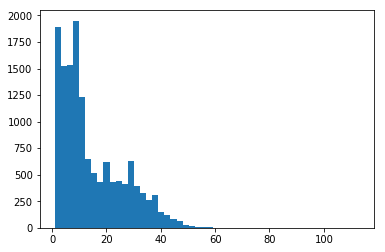

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist([len(s) for s in datax], bins=50)
plt.show()

In [46]:
print(max(len(x) for x in datax)) #113
print(max(len(y) for y in datay)) #113
# 길이를 113을 할지, 줄일지 어느정도로 할지 정해야함

113
113


In [48]:
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [0]:
maxLen=70
padx=pad_sequences(datax, padding='post', maxlen=maxLen)
# 뒤쪽에 모두 0으로 채움
pady=pad_sequences(datay, padding='post', maxlen=maxLen)

In [50]:
print(max(len(x) for x in padx))
print(max(len(x) for x in pady))
print(min(len(x) for x in padx))
print(min(len(x) for x in pady))

70
70
70
70


In [51]:
padx[0]
pady[0]

array([8, 1, 5, 1, 1, 1, 5, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int32)

In [0]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain, ytest=train_test_split(padx,pady, test_size=0.2, random_state=42)

In [53]:
len(xtrain) # 11232
len(xtest) # 2809

2809

In [0]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import Adam

In [0]:
n_words=len(word_to_index) # 1874 단어 종류
nlabels=len(ner_to_index) # 10개 태깅 종류

In [56]:
model=Sequential()
model.add(Embedding(input_dim=n_words, output_dim=16, input_length=maxLen, mask_zero=True)) # mask_zero=True : 패딩으로 생긴 0들을 제거하는 옵션
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Dense(nlabels, activation='softmax'))
# return_sequences=True : many to many
# return_sequences=False : many to one          

W0829 11:55:06.627257 139963679598464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0829 11:55:06.677314 139963679598464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0829 11:55:06.685368 139963679598464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0829 11:55:06.907504 139963679598464 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2974: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instruct

In [57]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001), metrics=['accuracy'])

W0829 11:55:11.058003 139963679598464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0829 11:55:11.065964 139963679598464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [58]:
from keras.utils import np_utils
ytrain2=np_utils.to_categorical(ytrain)
ytrain2[0][0] #7

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [59]:
model.fit(xtrain, ytrain2, epochs=8)

W0829 11:55:25.229529 139963679598464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/8
11232/11232 [==============================] - 106s 9ms/step - loss: 0.8666 - acc: 0.8275
Epoch 2/8
11232/11232 [==============================] - 100s 9ms/step - loss: 0.4984 - acc: 0.8489
Epoch 3/8
11232/11232 [==============================] - 98s 9ms/step - loss: 0.3837 - acc: 0.8788
Epoch 4/8
11232/11232 [==============================] - 98s 9ms/step - loss: 0.3122 - acc: 0.9038
Epoch 5/8
11232/11232 [==============================] - 98s 9ms/step - loss: 0.2582 - acc: 0.9232
Epoch 6/8
11232/11232 [==============================] - 97s 9ms/step - loss: 0.2182 - acc: 0.9364
Epoch 7/8
11232/11232 [==============================] - 95s 8ms/step - loss: 0.1949 - acc: 0.9431
Epoch 8/8
11232/11232 [==============================] - 96s 9ms/step - loss: 0.1812 - acc: 0.9470


In [65]:
ytest2=np_utils.to_categorical(ytest)


for key, value in word_to_index.items():
    index_to_word[value]=key
index_to_word

index_to_ner={}
for key, value in ner_to_index.items():
    index_to_ner[value]=key
index_to_ner
                              
# len(xtest)
# xtext[10]
                
ypredicted=model.predict(np.array([xtest[1]]))
ypredicted=np.argmax(ypredicted, axis=-1)
                
print("{:20} |{:5} | {}".format("단어","실제값","예측값")) 
print(40*"-")               
                
true=np.argmax(ytest2[1],-1)
for w,t,pred in zip(xtest[1], true, ypredicted[0]):
  if w != 0:                
    print("{:22} |{:7} | {}".format(index_to_word[w], index_to_ner[t], index_to_ner[pred]))      
             

단어                   |실제값   | 예측값
----------------------------------------
ties                   |O       | O
between                |O       | O
the                    |O       | O
two                    |O       | O
OOV                    |O       | O
,                      |O       | O
OOV                    |O       | O
also                   |O       | O
over                   |O       | O
a                      |O       | O
military               |O       | O
OOV                    |O       | O
between                |O       | O
turkey                 |B-LOC   | B-LOC
and                    |O       | O
israel                 |B-LOC   | B-LOC
which                  |O       | O
drew                   |O       | O
strong                 |O       | O
iranian                |B-MISC  | B-MISC
OOV                    |O       | O
,                      |O       | O
have                   |O       | O
improved               |O       | O
since                  |O       | O
islamist    

## k-means 알고리즘

In [0]:
import pandas as pd
df=pd.DataFrame(columns=['x','y'])

In [0]:
df.loc[0] = [3,1]
df.loc[1] = [4,1]
df.loc[2] = [3,2]
df.loc[3] = [4,2]
df.loc[4] = [10,5]
df.loc[5] = [10,6]
df.loc[6] = [11,5]
df.loc[7] = [11,6]
df.loc[8] = [15,1]
df.loc[9] = [15,2]
df.loc[10] = [16,1]
df.loc[11] = [16,2]

In [74]:
df

,x,y
0,3,1
1,4,1
2,3,2
3,4,2
4,10,5
5,10,6
6,11,5
7,11,6
8,15,1
9,15,2


In [0]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

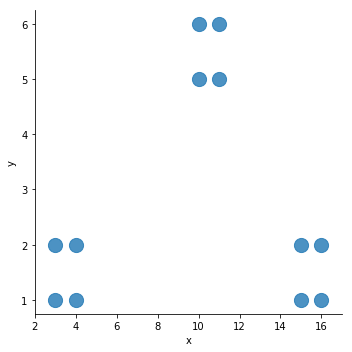

In [82]:
sns.lmplot('x','y', data=df, fit_reg=False, scatter_kws={"s":200})

In [88]:
data_points=df.values
kmeans=KMeans(n_clusters=3).fit(data_points)
kmeans.labels_

array([1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2], dtype=int32)

In [91]:
kmeans.cluster_centers_

array([[10.5,  5.5],
       [ 3.5,  1.5],
       [15.5,  1.5]])

In [0]:
df['cluster_id']=kmeans.labels_

In [93]:
df

,x,y,cluster_id
0,3,1,1
1,4,1,1
2,3,2,1
3,4,2,1
4,10,5,0
5,10,6,0
6,11,5,0
7,11,6,0
8,15,1,2
9,15,2,2


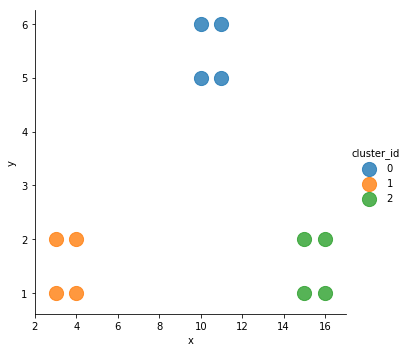

In [94]:
sns.lmplot('x','y', data=df, fit_reg=False, scatter_kws={"s":200}, hue='cluster_id')

## RNN 기반의 텍스트 생성 (전처리)

In [96]:
pip install konlpy

     |████████████████████████████████| 19.4MB 22.0MB/s 
     |████████████████████████████████| 2.7MB 48.3MB/s 


In [0]:
from konlpy.corpus import kolaw

In [0]:
c=kolaw.open("constitution.txt").read()

In [99]:
c

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.\n\n       제1장 총강\n  제1조 ① 대한민국은 민주공화국이다.\n②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.\n  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.\n②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.\n  제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.\n  제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.\n  제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.\n②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.\n  제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.\n②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.\n  제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.\n②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다.\n  제8조 ① 정

In [113]:
sent_tokenize(c)

['대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.',
 '제1장 총강\n  제1조 ① 대한민국은 민주공화국이다.',
 '②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.',
 '제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.',
 '②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.',
 '제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.',
 '제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.',
 '제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.',
 '②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.',
 '제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.',
 '②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.',
 '제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.',
 '②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 

In [114]:
len(sent_tokenize(c))
sentents=[s for s in sent_tokenize(c)]
sentents[3]

'제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.'

In [128]:
doc0=[" ".join(["".join(w) for w,t in okt.pos(s) if w not in ["제","조"] and t not in ['Number','Foreign']]) for s in sent_tokenize(c)]
doc0[3]
# [w for w,t in okt.pos(s) if w not in ["제","조"] for s in sent_tokenize(c)]
# 대한민국의 국민이 되는 요건은 법률로 정한다.
# for s in sent_tokenize(c):
# #   print(okt.pos(s))
#   for w,t in okt.pos(s):
#     if t not in ['Number','Foreign'] and w not in ['제','조']:
#       print(w)
  
  
  
# 대한민국의 국민이 되는 요건은 법률로 정한다.
# 대한민국 -> 은/의/헌번....
#             (70/20/0.5)

'대한민국 의 국민 이 되는 요건 은 법률 로 정 한다 .'

In [0]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(doc0)

In [140]:
# doc0에 있는 단어에 대한 인덱스
# for l in tokenizer.texts_to_sequences(doc0):
#   print(l) # 문장 단위로 단어의 인덱스 출력
doc=[l for l in tokenizer.texts_to_sequences(doc0) if len(l)>1]  
len(doc) # 354
# len(doc0) #357

354

In [142]:
doc[3]
# 대한민국 의 국민 이 되는 요건 은 법률 로 정 한다

[102, 1, 22, 5, 111, 653, 4, 9, 24, 13, 6]

In [151]:
# 전체 문장 중에서 문장을 구성하는 단어의 최대 개수
maxlen=max([len(x)-1 for x in doc]) 
vocab_size=len(tokenizer.word_index) # 전체 단어 수 
# print(maxlen)
#   print(len(x))
print(maxlen, vocab_size)

187 1164


#### 연습문제

In [0]:
nltk.dowonload('movie_reviews')

In [0]:
# word2vec 모델 생성
# api 문서 참조
# most_similar("kid"), most_similar("man")...
# 유사도 높은 단어 출력
# most_similar_cosmul("kid"),"man"
# similarity("boy","girl") 
# actor/actress....